## Preferential Class Voting using NFSE

In [40]:
import pandas as pd  
import numpy as np  
from sklearn.model_selection import train_test_split  
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier  
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler
df = pd.read_csv (r'Normalized_New_Extracted_Data.csv')
df['Label'] = df['Label'].replace('bad',1)
df['Label'] = df['Label'].replace('good',0)

In [41]:
def Classification_Report_Plotter(ytest,pred):
    C_Report=classification_report(ytest, pred,output_dict=True)
    C_Report_0=C_Report['0']
    C_Report_1=C_Report['1']
    del C_Report_1['support']
    del C_Report_0['support']
    cmat=confusion_matrix(ytest, pred)
    accuracy=cmat.diagonal()/cmat.sum(axis=1)
    print("Malicious Accuracy",accuracy[1])
    print("Good Accuracy",accuracy[0])
    C_Report_0['accuracy']=accuracy[0]
    C_Report_1['accuracy']=accuracy[1]
    df = pd.DataFrame([C_Report_0,C_Report_1],index=['Good','Malicious'],).transpose()
    fig, ax= plt.subplots(1,1, figsize=(6,5))
    df.plot.bar(ax=ax,title='Default Random Forest',fontsize =12,color=['g', 'r']).legend(bbox_to_anchor=(.7, 1))
    ##ax.set_xlabel('Scores')
    fig.tight_layout()

In [42]:
df1=df
Data=df1.drop(labels='URL', axis=1) 

In [43]:
Data= Data.drop(labels='Label', axis=1) 
col_names=Data.columns

In [44]:
Feature_List=['URL Length', 'Query Length', 'Number of Tokens', 'Number of .',
       'Number of -', 'Number of _', 'Number of =', 'Number of /',
       'Number of ?', 'Number of ;', 'Number of Open Paranthesis',
       'Number of Close Paranthesis', 'Number of %', 'Number of &',
       'Number of @', 'Number of Digits', 'Entropy', 'Number of !',
       'Number of ~', 'Number of +', 'Number of *', 'Number of #',
       'Number of $', 'IP_Presence', 'secure', 'account', 'webscr', 'login',
       'ebayisapi', 'signin', 'banking', 'confirm', 'blog', 'logon', 'signon',
       'login.asp', 'login.php', 'login.htm', '.exe', '.zip', '.rar', '.jpg',
       '.gif', 'viewer.php', 'link=', 'getImage.asp', 'plugins', 'paypal',
       'order', 'dbsys.php', 'config.bin', 'download.php', '.js', 'payment',
       'files', 'css', 'shopping', 'mail.php', '.jar', '.swf', '.cgi', '.php',
       'abuse', 'admin', '.bin', 'www', 'personal', 'update', 'verification',
       'server', 'client']

In [45]:
def Class_Accuracy(test,pred,class_):
    cmat=confusion_matrix(test_y, y_pred)
    accuracy=cmat.diagonal()/cmat.sum(axis=1)
    if class_=='good':
        return accuracy[0]
    elif class_=='bad':
        return accuracy[1]

In [46]:
def Class_Accuracy2(test,pred,class_):
    cmat=confusion_matrix(test, pred)
    accuracy=cmat.diagonal()/cmat.sum(axis=1)
    if class_=='good':
        return accuracy[0]
    elif class_=='bad':
        return accuracy[1]

In [47]:
import random 
def Random_Feature_Selector (list_in, n):
    random.shuffle(list_in)
    listx=[list_in[i::n] for i in range(n)]
    x= random.randint(1,n-1)
    return listx[x]  

In [48]:
## generate training data
train_x, test_x, train_y, test_y = train_test_split(Data,df['Label'],test_size =0.2,stratify = df.Label)
## Random Over Sampler
ros = RandomOverSampler()
X_res, y_res = ros.fit_resample(train_x, train_y)



In [49]:
Extractor_Data=pd.concat([pd.DataFrame(train_x),pd.DataFrame(train_y)], axis=1)
Extractor_Data
Extractor_Data.columns=df.columns[1:]
Extractor_DataX=Extractor_Data.drop(labels='Label', axis=1) 


In [50]:
Extractor_train_x, Extractor_test_x, Extractor_train_y, Extractor_test_y = train_test_split(Extractor_DataX,Extractor_Data['Label'],test_size =0.2,stratify = Extractor_Data.Label)
ros2 = RandomOverSampler()
X_resE, y_resE = ros2.fit_resample(Extractor_train_x, Extractor_train_y)
## Conversion back to DataFrame
Train_DataE=pd.DataFrame(X_resE)
Test_DataE=pd.DataFrame(Extractor_test_x)
Train_DataE.columns=col_names
Test_DataE.columns=col_names

In [51]:
combinations=3
factor=5
desired_accuracy=.815
i = 0
counter=1
List_bad=[]
while i < combinations:
    ## Create Random Filter
    clf_Filter=Random_Feature_Selector(Feature_List, factor)
    ## Filter Out Data
    clf_Test=Test_DataE.drop(labels=clf_Filter, axis=1)### Interact with external variables
    clf_Train=Train_DataE.drop(labels=clf_Filter, axis=1)### Interact with external variables
    clf = RandomForestClassifier(n_estimators=10,n_jobs=-1)
    clf.fit(clf_Train, y_resE);### Interact with external variables
    y_pred = clf.predict(clf_Test)
    accuracy=Class_Accuracy2(Extractor_test_y,y_pred, 'bad')
    if(accuracy>=desired_accuracy):
        List_bad.append(clf_Filter)
        print("Accuracy Found:", accuracy)
        i += 1
        print('Iteration#:',counter , ' Combinations Found:',i )
    counter+= 1
    accuracy = 0
print(List_bad) 

Accuracy Found: 0.8307031314550112
Iteration#: 48  Combinations Found: 1
Accuracy Found: 0.8202098653226473
Iteration#: 71  Combinations Found: 2
Accuracy Found: 0.8392960423035611
Iteration#: 72  Combinations Found: 3
[['Number of $', 'Number of %', 'getImage.asp', '.swf', 'files', 'Number of Close Paranthesis', 'Number of Tokens', 'URL Length', 'paypal', 'secure', 'Entropy', 'Number of ~', 'webscr', '.jar'], ['Entropy', 'files', '.swf', 'Number of .', 'config.bin', 'plugins', '.php', 'signon', '.jpg', '.zip', 'blog', 'secure', 'login.php', 'client'], ['account', 'Number of ?', 'mail.php', 'Number of .', 'blog', 'Number of ;', '.rar', 'Number of $', 'dbsys.php', 'Query Length', 'getImage.asp', 'URL Length', 'signon', 'Entropy']]


In [52]:
combinations=3
factor=5
desired_accuracy=.935
i = 0
counter=1
List_good=[]
while i < combinations:
    ## Create Random Filter
    clf_Filter=Random_Feature_Selector(Feature_List, factor)
    ## Filter Out Data
    clf_Test=Test_DataE.drop(labels=clf_Filter, axis=1)### Interact with external variables
    clf_Train=Train_DataE.drop(labels=clf_Filter, axis=1)### Interact with external variables
    clf = RandomForestClassifier(n_estimators=10,n_jobs=-1)
    clf.fit(clf_Train, y_resE);### Interact with external variables

    y_pred = clf.predict(clf_Test)
    accuracy=Class_Accuracy2(Extractor_test_y,y_pred, 'good')
    if(accuracy>=desired_accuracy):
        List_good.append(clf_Filter)
        print("Accuracy Found:", accuracy)
        i += 1
        print('Iteration#:',counter , ' Combinations Found:',i )
    counter+= 1
    accuracy = 0
print(List_good) 

Accuracy Found: 0.935492641194809
Iteration#: 33  Combinations Found: 1
Accuracy Found: 0.9358188936417023
Iteration#: 77  Combinations Found: 2
Accuracy Found: 0.9356738925541942
Iteration#: 95  Combinations Found: 3
[['Number of ?', 'abuse', 'payment', 'signon', 'shopping', 'viewer.php', 'ebayisapi', 'getImage.asp', 'IP_Presence', 'login.asp', '.rar', 'link=', 'plugins', 'Number of $'], ['Number of $', 'mail.php', 'ebayisapi', 'Number of =', 'plugins', 'Number of *', '.rar', 'getImage.asp', 'Number of ?', 'Number of #', 'Number of &', 'logon', '.gif', 'signon'], ['login.php', 'verification', '.jar', 'paypal', '.jpg', 'Number of *', 'signin', '.swf', 'Number of #', 'webscr', 'Query Length', 'Number of @', 'blog', 'Number of ;']]


In [53]:
F1_Filter=[]
F2_Filter=[]
F3_Filter=[]
F4_Filter=[]
F5_Filter=[]
F6_Filter=[]
x=0
for i in List_bad: 
    if x==0:
        F1_Filter=i
    elif x==1:
        F2_Filter=i
    elif x==2:
        F3_Filter=i
    x=x+1
    

In [54]:
for i in List_good: 
    if x==0:
        F4_Filter=i
    elif x==1:
        F5_Filter=i
    elif x==2:
        F6_Filter=i
    x=x+1

In [55]:
##Apply FIlters
Train_Data=pd.DataFrame(X_res)
Test_Data=pd.DataFrame(test_x)
Train_Data.columns=col_names
Test_Data.columns=col_names

F1_Test=Test_Data.drop(labels=F1_Filter, axis=1)
F1_Train=Train_Data.drop(labels=F1_Filter, axis=1)

F2_Test=Test_Data.drop(labels=F2_Filter, axis=1)
F2_Train=Train_Data.drop(labels=F2_Filter, axis=1)

F3_Test=Test_Data.drop(labels=F3_Filter, axis=1)
F3_Train=Train_Data.drop(labels=F3_Filter, axis=1)

F4_Test=Test_Data.drop(labels=F4_Filter, axis=1)
F4_Train=Train_Data.drop(labels=F4_Filter, axis=1)

F5_Test=Test_Data.drop(labels=F5_Filter, axis=1)
F5_Train=Train_Data.drop(labels=F5_Filter, axis=1)

In [56]:
F1_clf = RandomForestClassifier(n_jobs=-1)

In [57]:
F2_clf = RandomForestClassifier(n_jobs=-1)

In [58]:
F3_clf = RandomForestClassifier(n_jobs=-1)

In [59]:
F4_clf = RandomForestClassifier(n_jobs=-1)

In [60]:
F5_clf = RandomForestClassifier(n_jobs=-1)

In [61]:
X_train_list = [F1_Train, F2_Train,F3_Train,F4_Train,F5_Train]
X_test_list = [F1_Test, F2_Test,F3_Test,F4_Test,F5_Test]
classifiers = [('F1_clf',  F1_clf),('F2_clf', F2_clf),('F3_clf', F3_clf),('F4_clf', F4_clf),('F5_clf', F5_clf)]

In [62]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

def fit_multiple_estimators(classifiers, X_list, y, sample_weights = None):
    # Fit all estimators with their respective feature arrays
    estimators_ = [clf.fit(X, y) if sample_weights is None else clf.fit(X, y, sample_weights) for clf, X in zip([clf for _, clf in classifiers], X_list)]
    return estimators_ 


def predict_from_multiple_estimator(estimators, X_list, weights = None):
    # 'soft' voting with probabilities
    val=False
    pred1 = np.asarray([clf.predict_proba(X) for clf, X in zip(estimators, X_list)])
    pred2 = np.average(pred1, axis=0, weights=weights)
    pred = np.argmax(pred2, axis=1)
    # Convert integer predictions to original labels:
    return pred

In [63]:
fitted_estimators = fit_multiple_estimators(classifiers, X_train_list, y_res)
y_pred = predict_from_multiple_estimator(fitted_estimators, X_test_list)


C:\Users\Diego\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diego\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diego\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diego\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diego\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

In [64]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_y, y_pred))

0.9120616460347473


In [65]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95     68964
           1       0.72      0.84      0.77     15129

   micro avg       0.91      0.91      0.91     84093
   macro avg       0.84      0.88      0.86     84093
weighted avg       0.92      0.91      0.91     84093



In [66]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix:')
print(confusion_matrix(test_y, y_pred))

Confusion Matrix:
[[64020  4944]
 [ 2451 12678]]


Malicious Accuracy 0.8379932579813603
Good Accuracy 0.9283104228293022


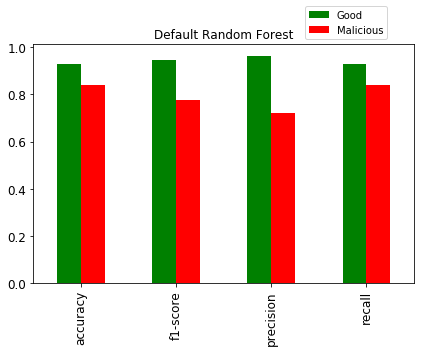

In [67]:
Classification_Report_Plotter(test_y, y_pred)

[[64020  4944]
 [ 2451 12678]]


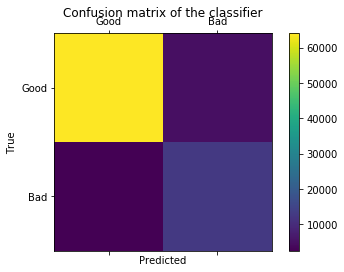

In [68]:
from sklearn.metrics import confusion_matrix

labels = ['Good', 'Bad']
cm = confusion_matrix(test_y, y_pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.89      0.92     68964
           1       0.62      0.84      0.71     15129

   micro avg       0.88      0.88      0.88     84093
   macro avg       0.79      0.86      0.82     84093
weighted avg       0.90      0.88      0.88     84093

0.8765771229472132
Malicious Accuracy 0.8353493291030472
Good Accuracy 0.8856214836726408


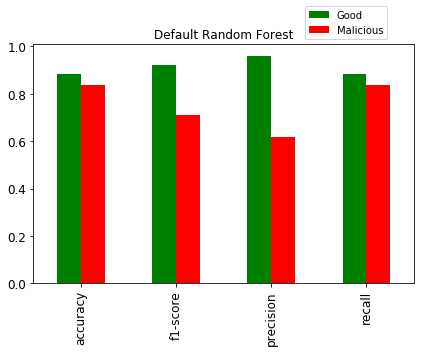

In [69]:
prediction_F1 = F1_clf.predict(F1_Test).tolist()
print(classification_report(test_y, prediction_F1))
print(accuracy_score(test_y, prediction_F1))
Classification_Report_Plotter(test_y, prediction_F1)

              precision    recall  f1-score   support

           0       0.96      0.86      0.91     68964
           1       0.57      0.82      0.67     15129

   micro avg       0.86      0.86      0.86     84093
   macro avg       0.76      0.84      0.79     84093
weighted avg       0.89      0.86      0.87     84093

0.8555171060611466
Malicious Accuracy 0.8224601758212704
Good Accuracy 0.8627689809175801


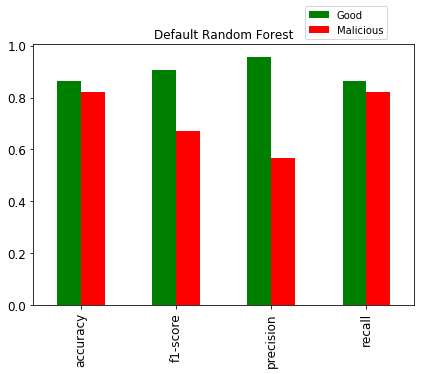

In [70]:
prediction_F2 = F2_clf.predict(F2_Test).tolist()
print(classification_report(test_y, prediction_F2))
print(accuracy_score(test_y, prediction_F2))
Classification_Report_Plotter(test_y, prediction_F2)

              precision    recall  f1-score   support

           0       0.96      0.85      0.90     68964
           1       0.56      0.84      0.67     15129

   micro avg       0.85      0.85      0.85     84093
   macro avg       0.76      0.85      0.79     84093
weighted avg       0.89      0.85      0.86     84093

0.851616662504608
Malicious Accuracy 0.8420913477427457
Good Accuracy 0.8537062815381938


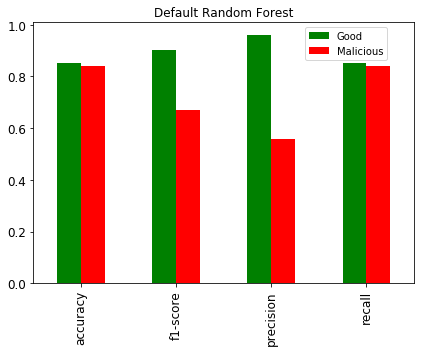

In [71]:
prediction_F3 = F3_clf.predict(F3_Test).tolist()
print(classification_report(test_y, prediction_F3))
print(accuracy_score(test_y, prediction_F3))
Classification_Report_Plotter(test_y, prediction_F3)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     68964
           1       0.73      0.80      0.76     15129

   micro avg       0.91      0.91      0.91     84093
   macro avg       0.84      0.87      0.85     84093
weighted avg       0.91      0.91      0.91     84093

0.9112173427039112
Malicious Accuracy 0.7999867803556084
Good Accuracy 0.9356185836088394


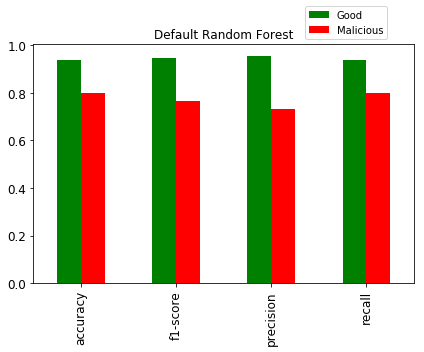

In [72]:
prediction_F4 = F4_clf.predict(F4_Test).tolist()
print(classification_report(test_y, prediction_F4))
print(accuracy_score(test_y, prediction_F4))
Classification_Report_Plotter(test_y, prediction_F4)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     68964
           1       0.73      0.80      0.76     15129

   micro avg       0.91      0.91      0.91     84093
   macro avg       0.84      0.87      0.86     84093
weighted avg       0.92      0.91      0.91     84093

0.9113362586660008
Malicious Accuracy 0.8021019234582589
Good Accuracy 0.935299576590685


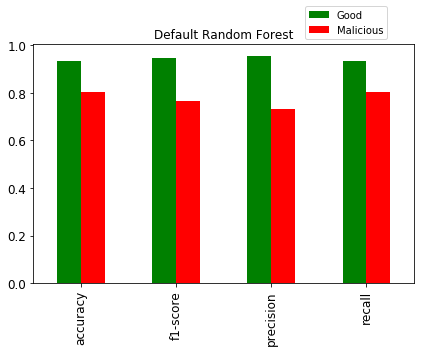

In [73]:
prediction_F5 = F5_clf.predict(F5_Test).tolist()
print(classification_report(test_y, prediction_F5))
print(accuracy_score(test_y, prediction_F5))
Classification_Report_Plotter(test_y, prediction_F5)